#ver algumas acoes - exercicios
#ibm, ford, apple e general eletric
#AAPL - Apple
#Ford - F
#IBM - IBM
#General Eletric - GE
#ver alguns indices tbm
#^IXIC - Nasdaq
#^DJI - Dow Jones
#^GSPC - S&P 500
#^BVSP - Ibovespa
#quote-nav > ul > li:nth-child(5) > a > span
#quote-nav > ul > li:nth-child(4) > a > span

In [1]:
#Importacao de pacotes
import time
import pandas as pd
import numpy as np
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from datetime import datetime

import matplotlib.gridspec as gridspec
import seaborn as sn

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import statistics as st

In [2]:
binary = FirefoxBinary('C:\\Program Files\\Mozilla Firefox\\firefox.exe')
driver = webdriver.Firefox(firefox_binary=binary, executable_path = r'C:\\geckodriver.exe')

In [4]:
def pesquisa(nome):

    url_site = "https://finance.yahoo.com"
    driver.get(url_site)
    time.sleep(5)

    #barra de pesquisa
    #id = yfin-usr-qry
    pesquisa = driver.find_element_by_id("yfin-usr-qry")
    pesquisa.click()
    nome = str(nome)
    pesquisa.send_keys(nome)

    #botao para clicar
    #id = header-desktop-search-button
    botao = driver.find_element_by_id("header-desktop-search-button")
    botao.click()
    time.sleep(10)
    
def historico(a,tipo):
    if tipo == "acao":
        b = driver.find_element_by_css_selector("li.IbBox:nth-child(5) > a:nth-child(1)")
    else:
        b = driver.find_element_by_css_selector("li.IbBox:nth-child(4) > a:nth-child(1)")
    
    b.click()
    time.sleep(10)
    
def pega_html(a):
    time.sleep(10)
    tabela = driver.find_element_by_tag_name("tbody")
    html = tabela.get_attribute('innerHTML')

    #pega o html da pagina
    mano = html.split('</span')
    dividendo,teste,linhas = [],[],[]
    global linhas
    #divide o html de acordo com "<span" para pegar as linhas
    for i in mano:
        #print i
        mano2 = i.split('<span')
        for j in mano2:
            #print j
            teste.append(j)

    #adiciona as linhas (estao em posicao impar) na variavel linhas
    for pos in range(0,len(teste)):
        if int(pos) % 2 == 1:
            #print teste[pos]
            if teste[pos] != ">Dividend":
                linhas.append(teste[pos])
            else:
                dividendo.append(teste[pos-1])
                linhas.append("dividendo")
                linhas.append("dividendo")
                linhas.append("dividendo")
                linhas.append("dividendo")
                linhas.append("dividendo")
                linhas.append("dividendo")

    for i in linhas:
        print(i)

    #linha 1 - data
    #linha 2 - abertura
    #linha 3 - maximo
    #linha 4 - minimo
    #linha 5 - fechamento
    #linha 6 - fechamento ajustado - com dividendos
    #linha 7 - volume
def trata(a):

    lin = 0
    data, abertura, maximo, minimo, fechamento, fechamento_ajustado, volume = [],[],[],[],[],[],[]
    global data
    global abertura
    global maximo 
    global minimo
    global fechamento
    global fechamento_ajustado
    global volume
    while lin < len(linhas):
        if linhas[lin] == "dividendo" or linhas[lin+1] == "dividendo":
            data.append(linhas[lin])
            abertura.append(linhas[lin+1])
            maximo.append(linhas[lin+2])
            minimo.append(linhas[lin+3])
            fechamento.append(linhas[lin+4])
            fechamento_ajustado.append(linhas[lin+5])
            volume.append(linhas[lin+6])

        else:
            dat = linhas[lin].split('>')
            data.append(dat[1])
            print(dat[1])

            abert = linhas[lin+1].split('>')
            abertura.append(abert[1])
            print(abert[1])

            maxi = linhas[lin+2].split('>')
            maximo.append(maxi[1])
            print(maxi[1])

            mini = linhas[lin+3].split('>')
            minimo.append(mini[1])
            print(mini[1])

            fec = linhas[lin+4].split('>')
            fechamento.append(fec[1])
            print(fec[1])

            fec_ajust = linhas[lin+5].split('>')
            fechamento_ajustado.append(fec_ajust[1])
            print(fec_ajust[1])

            if lin >= len(linhas) - 8:
                vol = linhas[-1].split('>')
                volume.append(vol[1])
                print(vol[1])

            else:
                vol = linhas[lin+6].split('>')
                volume.append(vol[1])
                print(vol[1])

        lin = lin + 7
    
def banco(a):
    global ibm
    ibm = {'data': data,'abertura': abertura,'maximo': maximo,'minimo': minimo,'fechamento': fechamento, 'fechamento_ajustado': fechamento_ajustado,'volume': volume}
    ibm = pd.DataFrame(ibm)
    #retirar linha dos dividendos
    indices = ibm[ibm['abertura'] == "dividendo"].index
    ibm.drop(indices, inplace=True)
    print(ibm)
        

SyntaxError: name 'linhas' is assigned to before global declaration (<ipython-input-4-13423c472209>, line 37)

In [5]:
#pegar da IBM
pesquisa("IBM")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_ibm = ibm

>Apr 01, 2021
>133.76
>133.93
>132.27
>133.23
>133.23
>4,074,000
>Mar 31, 2021
>134.54
>134.71
>132.71
>133.26
>133.26
>4,945,100
>Mar 30, 2021
>135.86
>136.27
>134.02
>134.72
>134.72
>4,790,400
>Mar 29, 2021
>135.98
>137.07
>135.51
>135.86
>135.86
>4,622,700
>Mar 26, 2021
>133.29
>136.48
>133.12
>136.38
>136.38
>5,562,500
>Mar 25, 2021
>130.33
>133.24
>129.77
>133.07
>133.07
>5,554,000
>Mar 24, 2021
>130.95
>132.11
>130.57
>130.62
>130.62
>4,005,000
>Mar 23, 2021
>130.44
>131.56
>129.80
>130.46
>130.46
>4,356,400
>Mar 22, 2021
>128.50
>130.72
>127.89
>130.55
>130.55
>4,164,900
>Mar 19, 2021
>130.02
>130.44
>128.53
>128.90
>128.90
>9,830,600
>Mar 18, 2021
>128.94
>131.00
>127.79
>130.06
>130.06
>5,834,600
>Mar 17, 2021
>128.46
>129.49
>127.49
>129.03
>129.03
>4,244,800
>Mar 16, 2021
>128.28
>128.52
>127.34
>128.24
>128.24
>4,630,400
>Mar 15, 2021
>127.77
>128.75
>127.54
>128.58
>128.58
>3,420,600
>Mar 12, 2021
>127.19
>127.68
>126.61
>127.61
>127.61
>4,009,600
>Mar 11, 2021
>128.09
>12

   abertura          data fechamento fechamento_ajustado  maximo  minimo  \
0    133.76  Apr 01, 2021     133.23              133.23  133.93  132.27   
1    134.54  Mar 31, 2021     133.26              133.26  134.71  132.71   
2    135.86  Mar 30, 2021     134.72              134.72  136.27  134.02   
3    135.98  Mar 29, 2021     135.86              135.86  137.07  135.51   
4    133.29  Mar 26, 2021     136.38              136.38  136.48  133.12   
5    130.33  Mar 25, 2021     133.07              133.07  133.24  129.77   
6    130.95  Mar 24, 2021     130.62              130.62  132.11  130.57   
7    130.44  Mar 23, 2021     130.46              130.46  131.56  129.80   
8    128.50  Mar 22, 2021     130.55              130.55  130.72  127.89   
9    130.02  Mar 19, 2021     128.90              128.90  130.44  128.53   
10   128.94  Mar 18, 2021     130.06              130.06  131.00  127.79   
11   128.46  Mar 17, 2021     129.03              129.03  129.49  127.49   
12   128.28 

In [6]:
#Pegar da Apple
pesquisa("AAPL")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_ap = ibm

>Apr 01, 2021
>123.66
>124.18
>122.49
>123.00
>123.00
>74,957,400
>Mar 31, 2021
>121.65
>123.52
>121.15
>122.15
>122.15
>118,323,800
>Mar 30, 2021
>120.11
>120.40
>118.86
>119.90
>119.90
>85,671,900
>Mar 29, 2021
>121.65
>122.58
>120.73
>121.39
>121.39
>80,819,200
>Mar 26, 2021
>120.35
>121.48
>118.92
>121.21
>121.21
>93,958,900
>Mar 25, 2021
>119.54
>121.66
>119.00
>120.59
>120.59
>98,844,700
>Mar 24, 2021
>122.82
>122.90
>120.07
>120.09
>120.09
>88,530,500
>Mar 23, 2021
>123.33
>124.24
>122.14
>122.54
>122.54
>95,467,100
>Mar 22, 2021
>120.33
>123.87
>120.26
>123.39
>123.39
>111,912,300
>Mar 19, 2021
>119.90
>121.43
>119.68
>119.99
>119.99
>185,023,200
>Mar 18, 2021
>122.88
>123.18
>120.32
>120.53
>120.53
>121,229,700
>Mar 17, 2021
>124.05
>125.86
>122.34
>124.76
>124.76
>111,437,500
>Mar 16, 2021
>125.70
>127.22
>124.72
>125.57
>125.57
>114,740,000
>Mar 15, 2021
>121.41
>124.00
>120.42
>123.99
>123.99
>92,403,800
>Mar 12, 2021
>120.40
>121.17
>119.16
>121.03
>121.03
>87,963,400
>Mar

   abertura          data fechamento fechamento_ajustado  maximo  minimo  \
0    123.66  Apr 01, 2021     123.00              123.00  124.18  122.49   
1    121.65  Mar 31, 2021     122.15              122.15  123.52  121.15   
2    120.11  Mar 30, 2021     119.90              119.90  120.40  118.86   
3    121.65  Mar 29, 2021     121.39              121.39  122.58  120.73   
4    120.35  Mar 26, 2021     121.21              121.21  121.48  118.92   
5    119.54  Mar 25, 2021     120.59              120.59  121.66  119.00   
6    122.82  Mar 24, 2021     120.09              120.09  122.90  120.07   
7    123.33  Mar 23, 2021     122.54              122.54  124.24  122.14   
8    120.33  Mar 22, 2021     123.39              123.39  123.87  120.26   
9    119.90  Mar 19, 2021     119.99              119.99  121.43  119.68   
10   122.88  Mar 18, 2021     120.53              120.53  123.18  120.32   
11   124.05  Mar 17, 2021     124.76              124.76  125.86  122.34   
12   125.70 

In [7]:
#Pegar da Ford
pesquisa("F")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_for = ibm

>Apr 01, 2021
>12.28
>12.29
>12.02
>12.17
>12.17
>61,777,900
>Mar 31, 2021
>12.46
>12.54
>12.21
>12.25
>12.25
>60,456,900
>Mar 30, 2021
>12.16
>12.48
>12.11
>12.46
>12.46
>49,762,300
>Mar 29, 2021
>12.20
>12.36
>12.07
>12.15
>12.15
>44,747,900
>Mar 26, 2021
>12.43
>12.49
>12.06
>12.30
>12.30
>49,205,000
>Mar 25, 2021
>11.94
>12.35
>11.72
>12.32
>12.32
>54,201,800
>Mar 24, 2021
>12.36
>12.53
>12.12
>12.14
>12.14
>54,534,400
>Mar 23, 2021
>12.57
>12.68
>12.12
>12.21
>12.21
>73,020,200
>Mar 22, 2021
>12.85
>12.93
>12.51
>12.85
>12.85
>81,362,100
>Mar 19, 2021
>12.85
>12.95
>12.55
>12.83
>12.83
>89,785,500
>Mar 18, 2021
>12.70
>13.01
>12.44
>12.49
>12.49
>76,619,600
>Mar 17, 2021
>12.34
>12.70
>12.22
>12.69
>12.69
>108,688,100
>Mar 16, 2021
>13.06
>13.15
>12.43
>12.49
>12.49
>124,964,700
>Mar 15, 2021
>13.39
>13.62
>13.05
>13.20
>13.20
>64,476,000
>Mar 12, 2021
>12.78
>13.43
>12.77
>13.37
>13.37
>87,078,700
>Mar 11, 2021
>12.94
>13.06
>12.75
>12.81
>12.81
>56,314,800
>Mar 10, 2021
>12.72
>

   abertura          data fechamento fechamento_ajustado maximo minimo  \
0     12.28  Apr 01, 2021      12.17               12.17  12.29  12.02   
1     12.46  Mar 31, 2021      12.25               12.25  12.54  12.21   
2     12.16  Mar 30, 2021      12.46               12.46  12.48  12.11   
3     12.20  Mar 29, 2021      12.15               12.15  12.36  12.07   
4     12.43  Mar 26, 2021      12.30               12.30  12.49  12.06   
5     11.94  Mar 25, 2021      12.32               12.32  12.35  11.72   
6     12.36  Mar 24, 2021      12.14               12.14  12.53  12.12   
7     12.57  Mar 23, 2021      12.21               12.21  12.68  12.12   
8     12.85  Mar 22, 2021      12.85               12.85  12.93  12.51   
9     12.85  Mar 19, 2021      12.83               12.83  12.95  12.55   
10    12.70  Mar 18, 2021      12.49               12.49  13.01  12.44   
11    12.34  Mar 17, 2021      12.69               12.69  12.70  12.22   
12    13.06  Mar 16, 2021      12.49  

In [8]:
#Pegar General Eletric
pesquisa("GE")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_ge = ibm

>Apr 01, 2021
>13.23
>13.36
>13.15
>13.28
>13.28
>58,728,000
>Mar 31, 2021
>13.38
>13.43
>13.13
>13.13
>13.13
>62,586,000
>Mar 30, 2021
>12.98
>13.36
>12.90
>13.30
>13.30
>52,925,100
>Mar 29, 2021
>12.92
>13.05
>12.78
>12.95
>12.95
>53,762,900
>Mar 26, 2021
>12.95
>13.13
>12.71
>12.99
>12.99
>60,452,800
>Mar 25, 2021
>12.40
>12.93
>12.23
>12.85
>12.85
>73,391,900
>Mar 24, 2021
>12.76
>13.02
>12.50
>12.50
>12.50
>62,073,500
>Mar 23, 2021
>12.96
>13.18
>12.55
>12.66
>12.66
>65,655,100
>Mar 22, 2021
>13.16
>13.24
>12.93
>13.13
>13.13
>52,789,100
>Mar 19, 2021
>13.20
>13.35
>12.98
>13.22
>13.22
>68,380,000
>Mar 18, 2021
>13.59
>13.69
>13.19
>13.25
>13.25
>63,668,400
>Mar 17, 2021
>13.20
>13.61
>13.13
>13.61
>13.61
>78,407,900
>Mar 16, 2021
>13.33
>13.35
>13.07
>13.15
>13.15
>74,180,900
>Mar 15, 2021
>12.74
>13.36
>12.73
>13.35
>13.35
>111,402,500
>Mar 12, 2021
>12.24
>12.62
>12.23
>12.58
>12.58
>134,236,800
>Mar 11, 2021
>12.69
>12.86
>11.95
>12.27
>12.27
>305,539,700
>Mar 10, 2021
>13.65


   abertura          data fechamento fechamento_ajustado maximo minimo  \
0     13.23  Apr 01, 2021      13.28               13.28  13.36  13.15   
1     13.38  Mar 31, 2021      13.13               13.13  13.43  13.13   
2     12.98  Mar 30, 2021      13.30               13.30  13.36  12.90   
3     12.92  Mar 29, 2021      12.95               12.95  13.05  12.78   
4     12.95  Mar 26, 2021      12.99               12.99  13.13  12.71   
5     12.40  Mar 25, 2021      12.85               12.85  12.93  12.23   
6     12.76  Mar 24, 2021      12.50               12.50  13.02  12.50   
7     12.96  Mar 23, 2021      12.66               12.66  13.18  12.55   
8     13.16  Mar 22, 2021      13.13               13.13  13.24  12.93   
9     13.20  Mar 19, 2021      13.22               13.22  13.35  12.98   
10    13.59  Mar 18, 2021      13.25               13.25  13.69  13.19   
11    13.20  Mar 17, 2021      13.61               13.61  13.61  13.13   
12    13.33  Mar 16, 2021      13.15  

In [9]:
#taxa de retorno de um portfolio
#multiplica a taxa de retorno pelo peso do portfolio
#considerando que Apple e Ford tem 30% cada e as demais 20%, podemos calcular
#calcular agora fingindo que todas tem peso iguais - 25%
tx_ret_ap = (float(df_ap.iloc[1,3]) - float(df_ap.iloc[-1,3]))/float(df_ap.iloc[-1,3])
tx_ret_for = (float(df_for.iloc[1,3]) - float(df_for.iloc[-1,3]))/float(df_for.iloc[-1,3])
tx_ret_ibm = (float(df_ibm.iloc[1,3]) - float(df_ibm.iloc[-1,3]))/float(df_ibm.iloc[-1,3])
tx_ret_ge = (float(df_ge.iloc[1,3]) - float(df_ge.iloc[-1,3]))/float(df_ge.iloc[-1,3])
print df_for.iloc[1,:]
print df_for.iloc[-1,:]
print float(df_for.iloc[1,3])
print float(df_for.iloc[-1,3])
print 100*(float(df_for.iloc[1,3]) - float(df_for.iloc[-1,3]))/float(df_for.iloc[-1,3])
#deu erro no df da ap
#fingir que sao 30, 30 e 40

abertura                      12.46
data                   Mar 31, 2021
fechamento                    12.25
fechamento_ajustado           12.25
maximo                        12.54
minimo                        12.21
volume                   60,456,900
Name: 1, dtype: object
abertura                       8.01
data                   Nov 06, 2020
fechamento                     7.79
fechamento_ajustado            7.79
maximo                         8.02
minimo                         7.75
volume                   50,912,100
Name: 99, dtype: object
12.25
7.79
57.2528883184


In [10]:
print 1000*(0.25*tx_ret_for + 0.25*tx_ret_ge + 0.25*tx_ret_ibm + 0.25*tx_ret_ap)
#rendeu 500, eita poxa - caso ford 30%, ge 30% e ibm 40%

444.974598366


In [10]:
print tx_ret_ap
print tx_ret_for
print tx_ret_ge
print tx_ret_ibm
#ge teve o maior retorno

0.051657339647
0.572528883184
0.463768115942
0.168844838172


In [11]:
#pegar indices
pesquisa("^GSPC")
time.sleep(5)
historico(1,"indice")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_sp = ibm

>Apr 01, 2021
>3,992.78
>4,020.63
>3,992.78
>4,019.87
>4,019.87
>4,151,240,000
>Mar 31, 2021
>3,967.25
>3,994.41
>3,966.98
>3,972.89
>3,972.89
>4,564,980,000
>Mar 30, 2021
>3,963.34
>3,968.01
>3,944.35
>3,958.55
>3,958.55
>4,103,570,000
>Mar 29, 2021
>3,969.31
>3,981.83
>3,943.25
>3,971.09
>3,971.09
>4,619,840,000
>Mar 26, 2021
>3,917.12
>3,978.19
>3,917.12
>3,974.54
>3,974.54
>5,467,850,000
>Mar 25, 2021
>3,879.34
>3,919.54
>3,853.50
>3,909.52
>3,909.52
>4,940,800,000
>Mar 24, 2021
>3,919.93
>3,942.08
>3,889.07
>3,889.14
>3,889.14
>4,766,990,000
>Mar 23, 2021
>3,937.60
>3,949.13
>3,901.57
>3,910.52
>3,910.52
>4,645,340,000
>Mar 22, 2021
>3,916.48
>3,955.31
>3,914.16
>3,940.59
>3,940.59
>4,311,380,000
>Mar 19, 2021
>3,913.14
>3,930.12
>3,886.75
>3,913.10
>3,913.10
>7,725,050,000
>Mar 18, 2021
>3,953.50
>3,969.62
>3,910.86
>3,915.46
>3,915.46
>4,043,170,000
>Mar 17, 2021
>3,949.57
>3,983.87
>3,935.74
>3,974.12
>3,974.12
>4,541,620,000
>Mar 16, 2021
>3,973.59
>3,981.04
>3,953.44
>3,962.7

    abertura          data fechamento fechamento_ajustado    maximo    minimo  \
0   3,992.78  Apr 01, 2021   4,019.87            4,019.87  4,020.63  3,992.78   
1   3,967.25  Mar 31, 2021   3,972.89            3,972.89  3,994.41  3,966.98   
2   3,963.34  Mar 30, 2021   3,958.55            3,958.55  3,968.01  3,944.35   
3   3,969.31  Mar 29, 2021   3,971.09            3,971.09  3,981.83  3,943.25   
4   3,917.12  Mar 26, 2021   3,974.54            3,974.54  3,978.19  3,917.12   
5   3,879.34  Mar 25, 2021   3,909.52            3,909.52  3,919.54  3,853.50   
6   3,919.93  Mar 24, 2021   3,889.14            3,889.14  3,942.08  3,889.07   
7   3,937.60  Mar 23, 2021   3,910.52            3,910.52  3,949.13  3,901.57   
8   3,916.48  Mar 22, 2021   3,940.59            3,940.59  3,955.31  3,914.16   
9   3,913.14  Mar 19, 2021   3,913.10            3,913.10  3,930.12  3,886.75   
10  3,953.50  Mar 18, 2021   3,915.46            3,915.46  3,969.62  3,910.86   
11  3,949.57  Mar 17, 2021  

In [14]:
#tratar as variaveis
print df_ap.dtypes
#tudo objeto
df_ap['data'] = pd.to_datetime(df_ap['data'])
df_ap['fechamento'] = pd.to_numeric(df_ap['fechamento'])
df_ap['maximo'] = pd.to_numeric(df_ap['maximo'])
df_ap['minimo'] = pd.to_numeric(df_ap['minimo'])
df_ap['fechamento_ajustado'] = pd.to_numeric(df_ap['fechamento_ajustado'])

df_for['data'] = pd.to_datetime(df_for['data'])
df_for['fechamento'] = pd.to_numeric(df_for['fechamento'])
df_for['maximo'] = pd.to_numeric(df_for['maximo'])
df_for['minimo'] = pd.to_numeric(df_for['minimo'])
df_for['fechamento_ajustado'] = pd.to_numeric(df_for['fechamento_ajustado'])

df_ge['data'] = pd.to_datetime(df_ge['data'])
df_ge['fechamento'] = pd.to_numeric(df_ge['fechamento'])
df_ge['maximo'] = pd.to_numeric(df_ge['maximo'])
df_ge['minimo'] = pd.to_numeric(df_ge['minimo'])
df_ge['fechamento_ajustado'] = pd.to_numeric(df_ge['fechamento_ajustado'])

df_ibm['data'] = pd.to_datetime(df_ibm['data'])
df_ibm['fechamento'] = pd.to_numeric(df_ibm['fechamento'])
df_ibm['maximo'] = pd.to_numeric(df_ibm['maximo'])
df_ibm['minimo'] = pd.to_numeric(df_ibm['minimo'])
df_ibm['fechamento_ajustado'] = pd.to_numeric(df_ibm['fechamento_ajustado'])

print df_ap.dtypes

abertura                       object
data                   datetime64[ns]
fechamento                    float64
fechamento_ajustado           float64
maximo                        float64
minimo                        float64
volume                         object
dtype: object
abertura                       object
data                   datetime64[ns]
fechamento                    float64
fechamento_ajustado           float64
maximo                        float64
minimo                        float64
volume                         object
dtype: object


In [15]:
#tratar a coluna volume
volume2 = []
for i in df_ap['volume']:
    i = i.replace(",","")
    volume2.append(i)
df_ap['volume'] = volume2

volume2 = []
for i in df_for['volume']:
    i = i.replace(",","")
    volume2.append(i)
df_for['volume'] = volume2

volume2 = []
for i in df_ge['volume']:
    i = i.replace(",","")
    volume2.append(i)
df_ge['volume'] = volume2

volume2 = []
for i in df_ibm['volume']:
    i = i.replace(",","")
    volume2.append(i)
df_ibm['volume'] = volume2

Text(0.5,1,'General Electric')

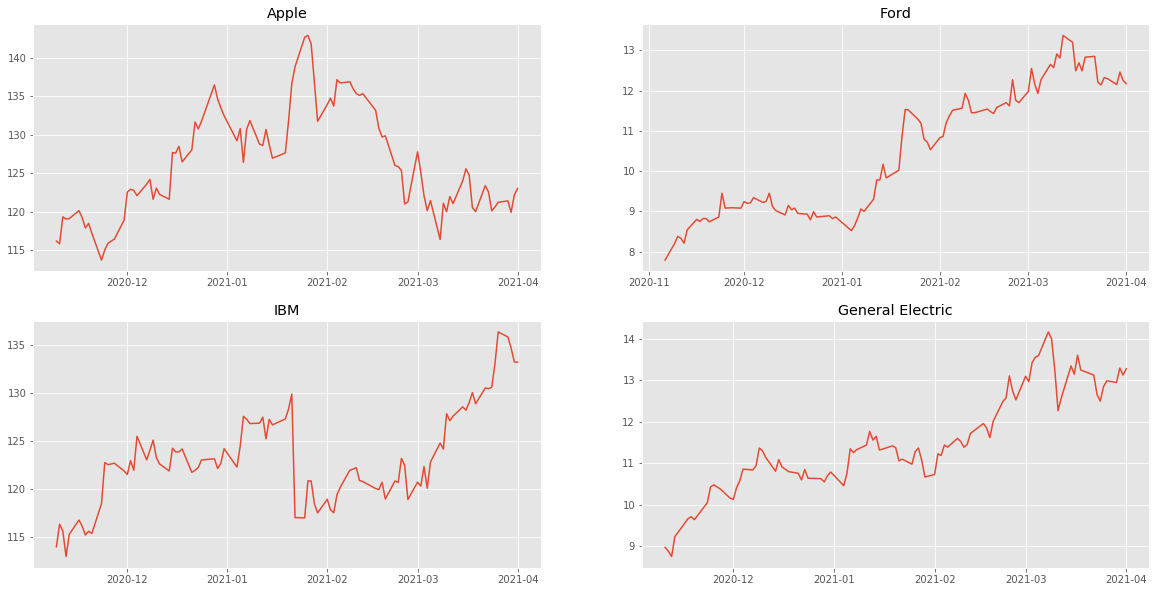

In [19]:
#ver evolucao dos precos ao longo do tempo
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (20,10))
ax1.plot(df_ap['data'], df_ap['fechamento_ajustado'])
ax2.plot(df_for['data'], df_for['fechamento_ajustado'])
ax3.plot(df_ibm['data'], df_ibm['fechamento_ajustado'])
ax4.plot(df_ge['data'], df_ge['fechamento_ajustado'])
ax1.set_title("Apple")
ax2.set_title("Ford")
ax3.set_title("IBM")
ax4.set_title("General Electric")

In [23]:
#verificar o risco com a variabilidade - desvio padrao
print st.stdev(df_ap['fechamento_ajustado'])
print st.stdev(df_for['fechamento_ajustado'])
print st.stdev(df_ge['fechamento_ajustado'])
print st.stdev(df_ibm['fechamento_ajustado'])
#a apple tem maior desvio padrao, ou seja, maior variabilidade

6.89544841946
1.56897167314
1.23162988831
4.94420667795


In [27]:
#verifica variabilidade do retorno
#usar df2
df2 = pd.DataFrame()
df2['apple'] = (df_ap['fechamento_ajustado'] - df_ap['fechamento_ajustado'].shift(1))*100/df_ap['fechamento_ajustado'].shift(1)
df2['ford'] = (df_for['fechamento_ajustado'] - df_for['fechamento_ajustado'].shift(1))*100/df_for['fechamento_ajustado'].shift(1)
df2['ibm'] = (df_ibm['fechamento_ajustado'] - df_ibm['fechamento_ajustado'].shift(1))*100/df_ibm['fechamento_ajustado'].shift(1)
df2['ge'] = (df_ge['fechamento_ajustado'] - df_ge['fechamento_ajustado'].shift(1))*100/df_ge['fechamento_ajustado'].shift(1)

In [30]:
df2 = df2.iloc[1:,:]
print df2

       apple      ford       ibm        ge
1  -0.691057  0.657354  0.022517 -1.129518
2  -1.841998  1.714286  1.095603  1.294745
3   1.242702 -2.487961  0.846200 -2.631579
4  -0.148282  1.234568  0.382747  0.308880
5  -0.511509  0.162602 -2.427042 -1.077752
6  -0.414628 -1.461039 -1.841136 -2.723735
7   2.040137  0.576606 -0.122493  1.280000
8   0.693651  5.241605  0.068987  3.712480
9  -2.755491 -0.155642 -1.263884  0.685453
10  0.450038 -2.650039  0.899922  0.226929
11  3.509500  1.601281 -0.791942  2.716981
12  0.649247 -1.576044 -0.612261 -3.379868
13 -1.258262  5.684548  0.265128  1.520913
14 -2.387289  1.287879 -0.754394 -5.767790
15  0.768405 -4.188482 -0.368310 -2.464229
16 -1.623483  0.780640  0.574170  7.986960
17  0.925154 -2.633617 -2.885743  5.660377
18 -3.906185  0.636436  0.507328  1.214286
19  4.348573 -3.003953 -1.586411 -4.022583
20 -1.062428 -2.770986 -2.214443       NaN
21  1.606593  2.011735  1.873283 -0.294118
22  2.506964  3.122432 -1.659039 -0.958702
23  2.13395

In [31]:
df2.describe()
#o maior desvio padrao é  o da ford = 2.5
#o menor é da ibm = 1.72
#a media de retorno é negativa
#verificar nos graficos

,apple,ford,ibm,ge
count,98.000000,98.000000,97.000000,96.000000
mean,-0.040005,-0.410314,-0.130883,-0.359142
std,1.927940,2.509247,1.722149,2.452849
min,-5.109946,-7.734807,-3.477765,-5.767790
25%,-1.176766,-2.148984,-1.185372,-2.344168
50%,0.083043,0.000000,-0.031526,-0.327239
75%,0.911659,1.189772,0.598852,1.218001
max,4.348573,5.684548,10.986758,7.986960


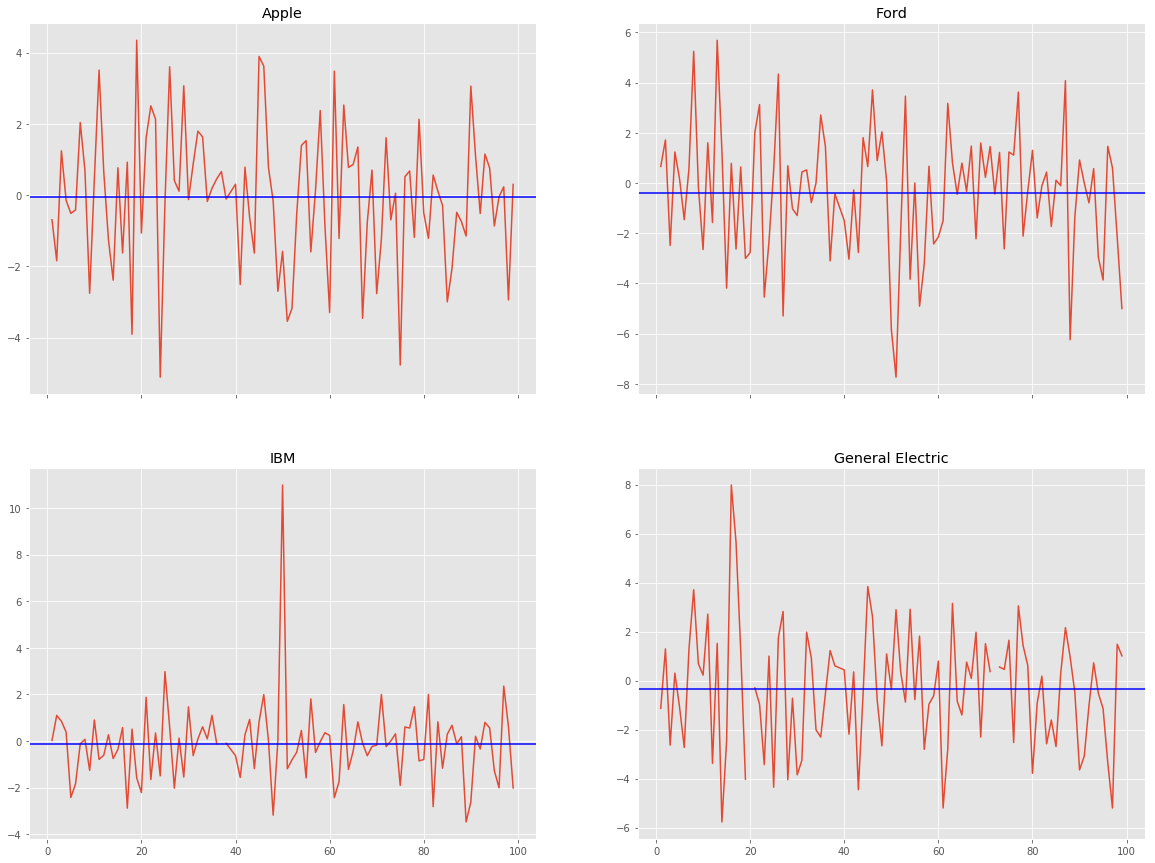

In [32]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,15),sharex=True)
ax1.plot(df2['apple'])
ax2.plot(df2['ford'])
ax3.plot(df2['ibm'])
ax4.plot(df2['ge'])
ax1.set_title('Apple')
ax2.set_title('Ford')
ax3.set_title('IBM')
ax4.set_title('General Electric')
ax1.axhline(df2['apple'].mean(), color="blue")
ax2.axhline(df2['ford'].mean(), color="blue")
ax3.axhline(df2['ibm'].mean(), color="blue")
ax4.axhline(df2['ge'].mean(), color="blue")
#beleza, o da ibm tem o retorno mais estavel, mais facil de fazer projecoes

In [ ]:
#relacao entre ativos
#o que impacta nas acoes: pib, desemprego, inflacao
#mercado em recessao, lucro diminui, preco das acoes caem
#o contrario é o contrario
#mas depende do segmento, quando em quarentena, as pessoas compram mais alimentos e os supermercados não tem seu lucro diminuido
#enquanto o da industria automobilistica vai cair pois pessoas vao circular menos, e comprar menos 
#diversificar a carteira a torna mais forte em momentos de crise

In [34]:
#colocando o preco de fechamento em outro df para comparar
df_fechamento = pd.DataFrame()
df_fechamento['apple'] = df_ap['fechamento_ajustado']
df_fechamento['ford'] = df_for['fechamento_ajustado']
df_fechamento['ibm'] = df_ibm['fechamento_ajustado']
df_fechamento['ge'] = df_ge['fechamento_ajustado']

          apple      ford       ibm        ge
apple  1.000000  0.149484 -0.033962 -0.080580
ford   0.149484  1.000000 -0.043264  0.018246
ibm   -0.033962 -0.043264  1.000000  0.061940
ge    -0.080580  0.018246  0.061940  1.000000


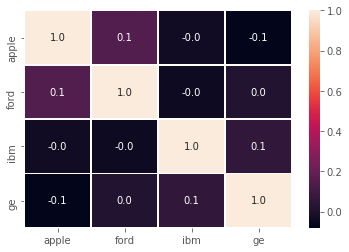

In [38]:
#relacao entre retornos - ?
#ex: apple e ibm são de tecnologia
print(df2.corr())
plot = sn.heatmap(df2.corr(), annot = True, fmt = ".1f", linewidths=.6)

          apple      ford       ibm        ge
apple  1.000000  0.084413 -0.093348 -0.018927
ford   0.084413  1.000000  0.428076  0.873786
ibm   -0.093348  0.428076  1.000000  0.619355
ge    -0.018927  0.873786  0.619355  1.000000


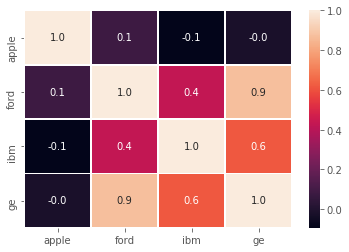

In [39]:
#correlacao entre precos
print(df_fechamento.corr())
plot2 = sn.heatmap(df_fechamento.corr(), annot = True, fmt = ".1f", linewidths=.6)

In [40]:
#matriz de covariancia
df_fechamento.cov()

,apple,ford,ibm,ge
apple,47.547209,0.916395,-3.169765,-0.162479
ford,0.916395,2.478662,3.351626,1.705833
ibm,-3.169765,3.351626,24.600131,3.854496
ge,-0.162479,1.705833,3.854496,1.532579


In [88]:
#tem um NaN em ge 
#df2.iloc[70,3] = 
#a = [df2.iloc[67:69,3],df2.iloc[71:73,3]]
a = df2.iloc[[67,68,69,71,72,73],3]
#na linha 20, iloc[19,3] tem nan tbm
b = df2.iloc[[16,17,18,20,21,22],3]
#na linha 37 tbm, iloc[36,2]
c = df2.iloc[[33,34,35,37,38,39],2]
print a
print st.mean(a)

df2.iloc[70,3] = st.mean(a)
df2.iloc[19,3] = st.mean(b)
df2.iloc[36,2] = st.mean(c)
print df2.iloc[70,3]
print df2.iloc[19,3]
print df2.iloc[36,2]

69   -2.304147
70    1.509434
71    0.371747
73    0.555556
74    0.460405
75    1.649863
Name: ge, dtype: float64
0.373809488712
0.3738094887121605
-0.30431784936889367
-0.20334069620687475


(array([ 8., 27., 48., 12.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.47776511, -2.03131282, -0.58486053,  0.86159176,  2.30804405,
         3.75449634,  5.20094863,  6.64740092,  8.09385321,  9.54030551,
        10.9867578 ]),
 <a list of 10 Patch objects>)

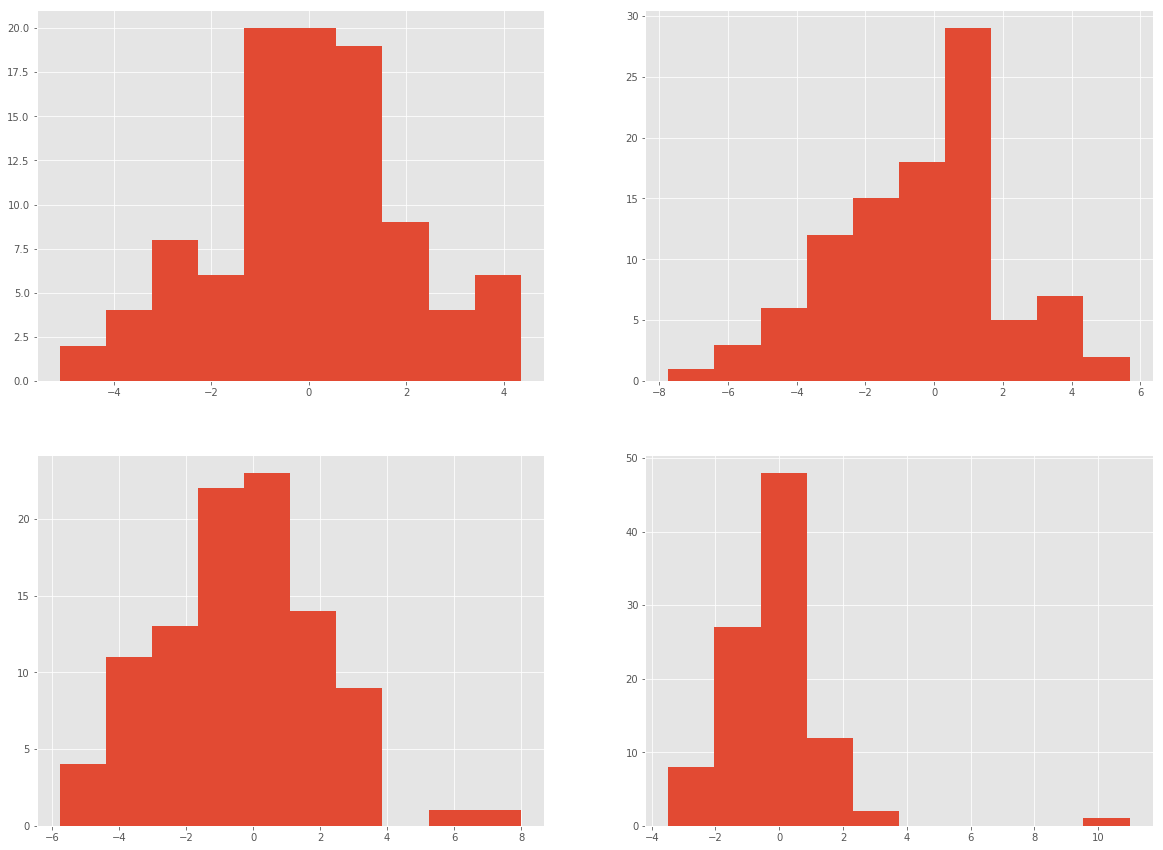

In [89]:
#esperanca matematica de cada retorno de cada acao
#esperanca é dada pela soma dos valores multiplicados pela probabilidade de ocorrerem
#verificar o histograma dos retornos
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))
ax1.hist(df2['apple'])
ax2.hist(df2['ford'])
ax3.hist(df2['ge'])
ax4.hist(df2['ibm'])

In [ ]:
# retorno de uma carteira com 2 investimentos
#acao 1 = a - fracao o
#acao 2 = b - fracao 1-o
#capital k
#retornos de cada sao r1 e r2, com e(ri) = ui e var(ri) = desvio(ri)^2, para i = 1,2 
#e p é coeficiente de correlacao entre os ativos
#temos que
# k(1 + r) = ok(1+r1) + (1-o)(1+r2)
#r(o) = r1*o + r2(1-o) 
#casos mais simples

In [87]:
df2.iloc[36,2]

nan

In [9]:
#pegar da petrobras
pesquisa("PETR4.SA")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_pet = ibm

 data-reactid="53">Apr 01, 2021
 data-reactid="55">24.29
 data-reactid="57">24.39
 data-reactid="59">23.78
 data-reactid="61">23.89
 data-reactid="63">23.89
 data-reactid="65">47,232,900
 data-reactid="68">Mar 31, 2021
 data-reactid="70">23.80
 data-reactid="72">24.23
 data-reactid="74">23.78
 data-reactid="76">24.10
 data-reactid="78">24.10
 data-reactid="80">68,609,400
 data-reactid="83">Mar 30, 2021
 data-reactid="85">23.64
 data-reactid="87">23.99
 data-reactid="89">23.57
 data-reactid="91">23.83
 data-reactid="93">23.83
 data-reactid="95">41,959,100
 data-reactid="98">Mar 29, 2021
 data-reactid="100">23.34
 data-reactid="102">23.83
 data-reactid="104">23.28
 data-reactid="106">23.83
 data-reactid="108">23.83
 data-reactid="110">50,099,700
 data-reactid="113">Mar 26, 2021
 data-reactid="115">23.48
 data-reactid="117">23.88
 data-reactid="119">23.11
 data-reactid="121">23.46
 data-reactid="123">23.46
 data-reactid="125">60,918,600
 data-reactid="128">Mar 25, 2021
 data-reactid="130"

Apr 01, 2021
24.29
24.39
23.78
23.89
47,232,900
Mar 31, 2021
23.80
24.23
23.78
24.10
68,609,400
Mar 30, 2021
23.64
23.99
23.57
23.83
41,959,100
Mar 29, 2021
23.34
23.83
23.28
23.83
50,099,700
Mar 26, 2021
23.48
23.88
23.11
23.46
60,918,600
Mar 25, 2021
22.70
23.30
22.16
23.20
79,214,500
Mar 24, 2021
23.19
23.54
22.82
22.82
63,338,300
Mar 23, 2021
23.17
23.63
22.80
22.80
57,124,700
Mar 22, 2021
23.69
23.78
23.23
23.52
44,129,300
Mar 19, 2021
23.27
24.04
23.18
24.00
90,244,500
Mar 18, 2021
23.88
23.90
23.07
23.24
77,198,900
Mar 17, 2021
23.14
24.13
23.11
24.08
77,966,400
Mar 16, 2021
23.63
23.68
23.23
23.28
43,407,900
Mar 15, 2021
23.11
23.67
23.10
23.65
68,295,000
Mar 12, 2021
23.15
23.38
22.86
23.17
68,123,200
Mar 11, 2021
22.62
23.49
22.61
23.29
130,577,500
Mar 10, 2021
21.94
22.34
21.58
22.34
111,744,100
Mar 09, 2021
21.36
21.95
20.86
21.59
122,648,000
Mar 08, 2021
21.94
22.28
20.96
21.10
141,142,800
Mar 05, 2021
22.44
23.22
22.29
22.39
126,306,300
Mar 04, 2021
21.30
22.40
21.12
22.2

IndexError: list index out of range

In [7]:
#pegar da magalu
pesquisa("VALE3.SA")
time.sleep(5)
historico(1,"acao")
time.sleep(5)
pega_html(1)
time.sleep(5)
trata(1)
time.sleep(5)
banco(1)
time.sleep(5)
df_va = ibm

>Apr 01, 2021
>98.50
>98.86
>96.13
>97.39
>97.39
>17,193,400
>Mar 31, 2021
>97.17
>98.56
>96.70
>97.97
>97.97
>18,792,000
>Mar 30, 2021
>97.91
>98.50
>96.58
>97.07
>97.07
>18,118,600
>Mar 29, 2021
>96.00
>98.45
>95.87
>97.98
>97.98
>25,960,500
>Mar 26, 2021
>93.74
>95.73
>93.39
>95.53
>95.53
>26,712,800
>Mar 25, 2021
>93.04
>93.29
>90.61
>92.44
>92.44
>23,644,400
>Mar 24, 2021
>92.00
>94.64
>91.81
>93.15
>93.15
>24,726,000
>Mar 23, 2021
>93.34
>93.78
>91.06
>91.06
>91.06
>20,518,500
>Mar 22, 2021
>93.52
>93.84
>91.85
>93.21
>93.21
>21,120,800
>Mar 19, 2021
>96.10
>96.16
>93.44
>94.78
>94.78
>38,643,000
>Mar 18, 2021
>97.70
>98.27
>95.53
>96.16
>96.16
>19,156,100
>Mar 17, 2021
>96.40
>98.12
>96.06
>97.90
>97.90
>21,424,300
>Mar 16, 2021
>97.04
>97.84
>96.02
>96.51
>96.51
>19,174,300
>Mar 15, 2021
>96.50
>97.35
>95.76
>96.82
>96.82
>20,059,000
>Mar 12, 2021
>99.00
>99.44
>96.71
>97.40
>97.40
>21,115,500
>Mar 11, 2021
>98.99
>100.10
>98.21
>99.70
>99.70
>26,203,200
>Mar 10, 2021
>97.50
>9

IndexError: list index out of range

In [8]:
df_pet['data'] = pd.to_datetime(df_pet['data'])
df_mgl['data'] = pd.to_datetime(df_mgl['data'])

df_pet['fechamento_ajustado'] = pd.to_numeric(df_pet['fechamento_ajustado'])
df_mgl['fechamento_ajustado'] = pd.to_numeric(df_mgl['fechamento_ajustado'])

vol2 = []
for i in df_pet['volume']:
    i = i.replace(',','')
    vol2.append(i)
df_pet['volume']

vol2 = []
for i in df_mgl['volume']:
    i = i.replace(',','')
    vol2.append(i)
df_mgl['volume']

NameError: name 'df_pet' is not defined

In [6]:
data

[u'Apr 01, 2021',
 u'Mar 31, 2021',
 u'Mar 30, 2021',
 u'Mar 29, 2021',
 u'Mar 26, 2021',
 u'Mar 25, 2021',
 u'Mar 24, 2021',
 u'Mar 23, 2021',
 u'Mar 22, 2021',
 u'Mar 19, 2021',
 u'Mar 18, 2021',
 u'Mar 17, 2021',
 u'Mar 16, 2021',
 u'Mar 15, 2021',
 u'Mar 12, 2021',
 u'Mar 11, 2021',
 u'Mar 10, 2021',
 u'Mar 09, 2021',
 u'Mar 08, 2021',
 u'Mar 05, 2021',
 u'Mar 04, 2021',
 u'Mar 03, 2021',
 u'Mar 02, 2021',
 u'Mar 01, 2021',
 u'Feb 26, 2021',
 u'Feb 25, 2021',
 u'Feb 24, 2021',
 u'Feb 23, 2021',
 u'Feb 22, 2021',
 u'Feb 19, 2021',
 u'Feb 18, 2021',
 u'Feb 17, 2021',
 u'47,801,100',
 u'61,158,600',
 u'52,949,900',
 u'63,662,200',
 u'98,821,700',
 u'121,098,700',
 u'41,444,100',
 u'47,486,800',
 u'91,663,000',
 u'44,449,500',
 u'67,555,300',
 u'67,827,000',
 u'68,337,800',
 u'64,514,600',
 u'51,181,900',
 u'41,284,900',
 u'60,306,200',
 u'61,656,000',
 u'68,855,700',
 u'80,673,300',
 u'50,745,400',
 u'93,826,600',
 u'65,691,900',
 u'48,744,700',
 u'67,136,300',
 u'56,171,300',
 u'96,5